In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   

In [39]:
# import packages for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [40]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [41]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [42]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [43]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [44]:
# reading data into dataframe
CC = pd.read_csv('C:/Users/yoosha/Downloads/Documents/segmentation case study/CC_GENERAL.csv')

In [45]:
CC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [46]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [116]:
# Export pandas profiling output to html file
output = pandas_profiling.ProfileReport(CC)
output.to_file('pandas_profiling.html')

In [47]:
CC_num = CC.select_dtypes(['float64', 'int64', 'float32', 'int32'])
CC_object = CC.select_dtypes(['object'])

In [48]:
CC_num.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [49]:
CC_object.columns

Index(['CUST_ID'], dtype='object')

In [50]:
num_summary = CC_num.apply(continuous_var_summary)
num_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
N,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.949000e+03,8.950000e+03,8.637000e+03,8950.000000,8950.000000
NMISS,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,3.130000e+02,0.000000,0.000000
SUM,1.400205e+07,7851.572994,8.978683e+06,5.302314e+06,3.679055e+06,8.760896e+06,4388.637408,1811.996268,3261.714207,1209.540593,29077.000000,131653.000000,4.022083e+07,1.551164e+07,7.464152e+06,1375.746104,103080.000000
MEAN,1.564475e+03,0.877271,1.003205e+03,5.924374e+02,4.110676e+02,9.788711e+02,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4.494449e+03,1.733144e+03,8.642065e+02,0.153715,11.517318
MEDIAN,8.733852e+02,1.000000,3.612800e+02,3.800000e+01,8.900000e+01,0.000000e+00,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3.000000e+03,8.569015e+02,3.123439e+02,0.000000,12.000000
STD,2.081532e+03,0.236904,2.136635e+03,1.659888e+03,9.043381e+02,2.097164e+03,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3.638816e+03,2.895064e+03,2.372447e+03,0.292499,1.338331
VAR,4.332775e+06,0.056124,4.565208e+06,2.755228e+06,8.178274e+05,4.398096e+06,0.161098,0.089004,0.157965,0.040049,46.575803,617.902719,1.324098e+07,8.381394e+06,5.628503e+06,0.085556,1.791129
MIN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+01,0.000000e+00,1.916300e-02,0.000000,6.000000
P1,6.510059e-02,0.090909,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,0.000000e+00,1.952448e+01,0.000000,6.000000
P5,8.814518e+00,0.272727,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,8.998892e+01,7.328201e+01,0.000000,8.000000


In [51]:
# Handling Outliers
CC_num = CC_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [52]:
CC_num = CC_num.apply(missing_imputation)

In [53]:
CC_num.apply(continuous_var_summary).T.round(1)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,13792368.0,1541.0,873.4,1966.6,3867505.7,0.1,0.1,8.8,23.6,128.3,873.4,2054.1,4338.6,5909.1,9337.1,9338.8
BALANCE_FREQUENCY,8950.0,0.0,7858.8,0.9,1.0,0.2,0.1,0.1,0.1,0.3,0.5,0.9,1.0,1.0,1.0,1.0,1.0,1.0
PURCHASES,8950.0,0.0,8379251.7,936.2,361.3,1525.2,2326189.8,0.0,0.0,0.0,0.0,39.6,361.3,1110.1,2542.6,3998.6,8961.8,8977.3
ONEOFF_PURCHASES,8950.0,0.0,4801619.3,536.5,38.0,1096.9,1203219.3,0.0,0.0,0.0,0.0,0.0,38.0,577.4,1600.1,2671.1,6684.2,6689.9
INSTALLMENTS_PURCHASES,8950.0,0.0,3441260.4,384.5,89.0,676.3,457342.6,0.0,0.0,0.0,0.0,0.0,89.0,468.6,1140.1,1750.1,3885.9,3886.2
CASH_ADVANCE,8950.0,0.0,8376492.7,935.9,0.0,1775.8,3153373.8,0.0,0.0,0.0,0.0,0.0,0.0,1113.8,3065.5,4647.2,9584.0,9588.2
PURCHASES_FREQUENCY,8950.0,0.0,4388.6,0.5,0.5,0.4,0.2,0.0,0.0,0.0,0.0,0.1,0.5,0.9,1.0,1.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.0,0.2,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.3,0.8,1.0,1.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.7,0.4,0.2,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.8,1.0,1.0,1.0,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1199.4,0.1,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.6,0.8,0.8


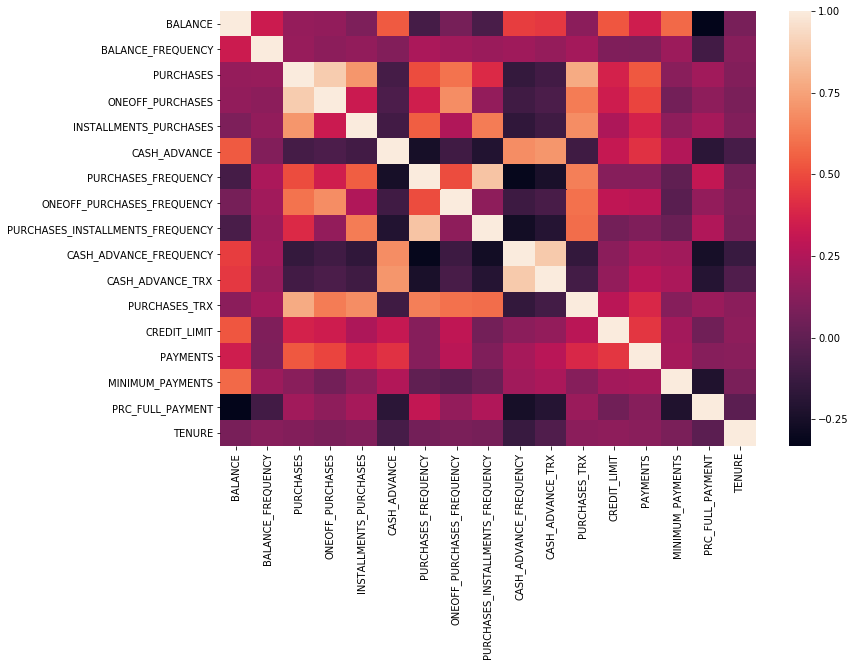

In [54]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(CC_num.corr())
plt.show()

### Standardrizing data 
- To put data on the same scale 

In [55]:
CC_num.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [56]:
CC_num['BALANCE TO CREDIT LIMIT RATIO'] = CC_num.BALANCE / CC_num.CREDIT_LIMIT
CC_num['PAYMENTS TO MINIMUM_PAYMENTS RATIO'] = CC_num.PAYMENTS / CC_num.MINIMUM_PAYMENTS

In [57]:
# drop some of the variables
CC_num.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
        'PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'], 
               axis = 1, inplace = True)

In [58]:
CC_num.shape

(8950, 8)

In [59]:
CC_num.head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE TO CREDIT LIMIT RATIO,PAYMENTS TO MINIMUM_PAYMENTS RATIO
0,0.00,95.4,0.000000,0.000000,0,2.0,0.040901,1.446508
1,0.00,0.0,6442.945483,0.000000,4,0.0,0.457495,3.826241
2,773.17,0.0,0.000000,1.000000,0,12.0,0.332687,0.991682
3,1499.00,0.0,205.788017,0.083333,1,1.0,0.222223,0.000000
4,16.00,0.0,0.000000,0.083333,0,1.0,0.681429,2.771075


#### standardize the data

In [60]:
sc = StandardScaler()
CC_scaled = sc.fit_transform( CC_num )

C:\Users\yoosha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yoosha\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [61]:
pd.DataFrame(CC_scaled).head()

,0,1,2,3,4,5,6,7
0,-0.489121,-0.427513,-0.527079,-0.678661,-0.557505,-0.579714,-0.979686,-0.268383
1,-0.489121,-0.568588,3.101370,-0.678661,0.166685,-0.675130,0.205564,-0.111512
2,0.215778,-0.568588,-0.527079,2.673451,-0.557505,-0.102638,-0.149528,-0.298365
3,0.877517,-0.568588,-0.411186,-0.399319,-0.376457,-0.627422,-0.463808,-0.363736
4,-0.474534,-0.568588,-0.527079,-0.399319,-0.557505,-0.627422,0.842675,-0.181068


#### Variable reduction: applying PCA

In [62]:
CC_scaled.shape

(8950, 8)

In [63]:
pc = PCA( n_components = 8 ).fit( CC_scaled )

In [64]:
pc.explained_variance_

array([2.76951909, 1.79128178, 1.09837068, 0.87170165, 0.68357475,
       0.31338353, 0.27838931, 0.19467316])

In [65]:
# eigen values
sum(pc.explained_variance_)

8.000893954631765

In [66]:
# amount of variance that each PC explains
pc.explained_variance_ratio_

array([0.34615121, 0.22388521, 0.137281  , 0.10895053, 0.0854373 ,
       0.03916856, 0.03479478, 0.02433143])

In [67]:
# cumulative variance explained
var = np.cumsum( np.round( pc.explained_variance_ratio_, decimals = 4 ) * 100 )
var

array([ 34.62,  57.01,  70.74,  81.64,  90.18,  94.1 ,  97.58, 100.01])

In [68]:
pd.DataFrame({'Eigen_Values': pc.explained_variance_, 'VAR': pc.explained_variance_ratio_, 
                  'Cumm_VAR': var}, index = range(1, 9))

,Eigen_Values,VAR,Cumm_VAR
1,2.769519,0.346151,34.62
2,1.791282,0.223885,57.01
3,1.098371,0.137281,70.74
4,0.871702,0.108951,81.64
5,0.683575,0.085437,90.18
6,0.313384,0.039169,94.10
7,0.278389,0.034795,97.58
8,0.194673,0.024331,100.01


Approach 1: Try to trade-off between independent components (eigen value =1) and cummulative variance (around ~ 70%)

Approach 2: Number of components have choosen as 6 based on cumulative variacne is explaining ~ 75 % and individual component explaining ~ 0.8 variance

In [69]:
pc_final = PCA( n_components = 4 ).fit( CC_scaled )

In [70]:
pc_final.explained_variance_

array([2.76951909, 1.79128178, 1.09837068, 0.87170165])

In [71]:
CC_scaled.shape

(8950, 8)

In [72]:
reduced_cr = pc_final.fit_transform( CC_scaled )  # the out put is Factors (F1, F2, ...F9)

In [74]:
dimensions = pd.DataFrame( reduced_cr, columns = ["C1", "C2", "C3", "C4"] )

In [75]:
dimensions.shape

(8950, 4)

#### Loading Matrix

Loadings = Eigenvectors * sqrt( Eigenvalues )

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [76]:
# pc_final.components_
# print pd.DataFrame(pc_final.components_,columns = CC_num.columns).T
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,
                         columns = CC_num.columns).T

In [77]:
Loadings.columns = ['C1', 'C2', 'C3', 'C4']
Loadings

,C1,C2,C3,C4
ONEOFF_PURCHASES,0.787292,0.280388,-0.013997,-0.344631
INSTALLMENTS_PURCHASES,0.664220,0.137970,-0.072063,0.692026
CASH_ADVANCE,-0.343756,0.796719,0.267327,0.036979
ONEOFF_PURCHASES_FREQUENCY,0.758960,0.227487,-0.059772,-0.473186
CASH_ADVANCE_TRX,-0.350403,0.825845,0.140132,0.010698
PURCHASES_TRX,0.863703,0.259707,-0.134340,0.209990
BALANCE TO CREDIT LIMIT RATIO,-0.284167,0.507539,-0.512533,0.032308
PAYMENTS TO MINIMUM_PAYMENTS RATIO,0.254555,-0.007352,0.847096,0.059199


In [117]:
Loadings.to_excel('Loadings.xlsx')

### Clustering 

In [78]:
km_3 = KMeans( n_clusters = 3, random_state = 123).fit( dimensions )

In [79]:
km_3.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [80]:
km_4 = KMeans( n_clusters = 4, random_state = 123).fit( dimensions )
km_5 = KMeans( n_clusters = 5, random_state = 123).fit( dimensions )
km_6 = KMeans( n_clusters = 6, random_state = 123).fit( dimensions )
km_7 = KMeans( n_clusters = 7, random_state = 123).fit( dimensions )
km_8 = KMeans( n_clusters = 8, random_state = 123).fit( dimensions )

In [81]:
CC_num.head(2)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE TO CREDIT LIMIT RATIO,PAYMENTS TO MINIMUM_PAYMENTS RATIO
0,0.0,95.4,0.000000,0.0,0,2.0,0.040901,1.446508
1,0.0,0.0,6442.945483,0.0,4,0.0,0.457495,3.826241


In [82]:
# save the cluster labels and sort by cluster
CC_num['cluster_3'] = km_3.labels_
CC_num['cluster_4'] = km_4.labels_
CC_num['cluster_5'] = km_5.labels_
CC_num['cluster_6'] = km_6.labels_
CC_num['cluster_7'] = km_7.labels_
CC_num['cluster_8'] = km_8.labels_

In [83]:
CC_num.head(2)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE TO CREDIT LIMIT RATIO,PAYMENTS TO MINIMUM_PAYMENTS RATIO,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.0,95.4,0.000000,0.0,0,2.0,0.040901,1.446508,0,0,4,3,2,3
1,0.0,0.0,6442.945483,0.0,4,0.0,0.457495,3.826241,1,1,2,5,1,1


### Count method

In [84]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

0    0.690168
1    0.167486
2    0.142346
dtype: float64

In [85]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

0    0.439888
3    0.338212
2    0.128715
1    0.093184
dtype: float64

In [86]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

4    0.392067
1    0.323017
0    0.143240
2    0.088603
3    0.053073
dtype: float64

In [87]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

3    0.393520
2    0.320894
0    0.143575
5    0.088492
4    0.052961
1    0.000559
dtype: float64

In [88]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

2    0.365028
0    0.309832
6    0.132737
1    0.086592
4    0.069050
3    0.036201
5    0.000559
dtype: float64

In [89]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())

3    0.352626
7    0.240112
0    0.130168
1    0.124804
6    0.068268
4    0.047486
2    0.036201
5    0.000335
dtype: float64

In [ ]:
### From count method we can state that we can opt for 5 cluster solution.

### Choosing number clusters using Silhouette Coefficient

In [90]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score( dimensions, km_8.labels_ )

0.3328107700074609

In [91]:
# calculate SC for K = 3 through K = 12
k_range = range(3, 13)
scores = []
for k in k_range:
    km = KMeans( n_clusters = k, random_state = 123 ).fit( dimensions )
    scores.append( metrics.silhouette_score( dimensions, km.labels_ ) )

In [92]:
scores

[0.3937840224303856,
 0.3090931489446281,
 0.3387865600489041,
 0.34145722073003226,
 0.35651618649802136,
 0.3328107700074609,
 0.3335948874437584,
 0.3277280317774621,
 0.3374297120164335,
 0.34320340501232244]

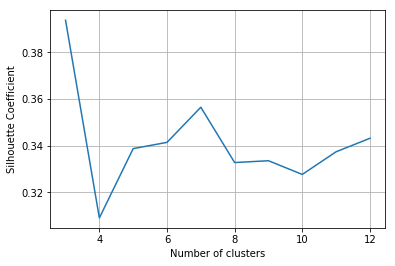

In [93]:
# plot the results
plt.plot( k_range, scores )
plt.xlabel( 'Number of clusters' )
plt.ylabel( 'Silhouette Coefficient' )
plt.grid( True )

##### Note

The solution can be 3 or 7 based on the SC score. If we take highest SC score, 3 or 7 segment solution is best

### Elbow Analysis 

In [94]:
cluster_range = range( 2, 13 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters ).fit( dimensions )
    cluster_errors.append( clusters.inertia_ )

In [95]:
clusters_df = pd.DataFrame( { 'num_clusters': cluster_range, 
                                 'cluster_errors': cluster_errors } )

In [96]:
clusters_df

,num_clusters,cluster_errors
0,2,41975.843770
1,3,31818.511012
2,4,27328.605019
3,5,23093.366336
4,6,19585.131911
5,7,17048.014103
6,8,15699.170409
7,9,14466.671611
8,10,13343.201677
9,11,12583.855654


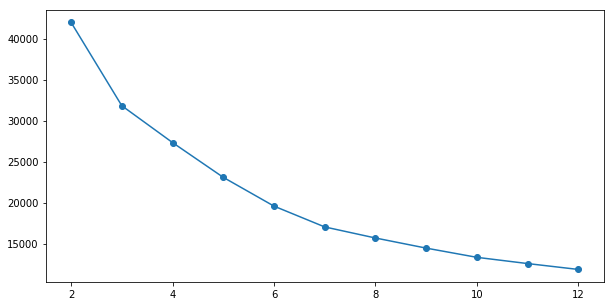

In [97]:
# allow plots to appear in the notebook
plt.figure( figsize = ( 10, 5 ) )
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o' )
plt.show()

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 5 to 7. So, optimal number of clusters could either 5 or 7. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

## Profiling

In [98]:
CC_num.head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE TO CREDIT LIMIT RATIO,PAYMENTS TO MINIMUM_PAYMENTS RATIO,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.00,95.4,0.000000,0.000000,0,2.0,0.040901,1.446508,0,0,4,3,2,3
1,0.00,0.0,6442.945483,0.000000,4,0.0,0.457495,3.826241,1,1,2,5,1,1
2,773.17,0.0,0.000000,1.000000,0,12.0,0.332687,0.991682,0,0,0,0,6,0
3,1499.00,0.0,205.788017,0.083333,1,1.0,0.222223,0.000000,0,0,4,3,2,3
4,16.00,0.0,0.000000,0.083333,0,1.0,0.681429,2.771075,0,3,1,2,0,7


In [99]:
CC_num.cluster_3.value_counts()

0    6177
1    1499
2    1274
Name: cluster_3, dtype: int64

In [100]:
CC_num.cluster_3.value_counts()*100/sum(CC_num.cluster_3.value_counts())

0    69.016760
1    16.748603
2    14.234637
Name: cluster_3, dtype: float64

In [101]:
CC_num.cluster_3.value_counts()

0    6177
1    1499
2    1274
Name: cluster_3, dtype: int64

In [102]:
size = pd.concat([pd.Series(CC_num.cluster_3.size), 
                    pd.Series.sort_index(CC_num.cluster_3.value_counts()), 
                    pd.Series.sort_index(CC_num.cluster_4.value_counts()),
                    pd.Series.sort_index(CC_num.cluster_5.value_counts()), 
                    pd.Series.sort_index(CC_num.cluster_6.value_counts()),
                    pd.Series.sort_index(CC_num.cluster_7.value_counts()), 
                    pd.Series.sort_index(CC_num.cluster_8.value_counts())])

In [103]:
Seg_size = pd.DataFrame( size, columns = ['Seg_size'] )
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,6177,1499,1274,3937,834,1152,3027,1282,2891,...,5,1188,1165,1117,324,3156,425,3,611,2149


In [104]:
Seg_Pct = pd.DataFrame( size / CC_num.cluster_3.size, columns = ['Seg_Pct'] )
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.690168,0.167486,0.142346,0.439888,0.093184,0.128715,0.338212,0.14324,0.323017,...,0.000559,0.132737,0.130168,0.124804,0.036201,0.352626,0.047486,0.000335,0.068268,0.240112


In [105]:
# Mean value gives a good indication of the distribution of data. 
# So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([CC_num.apply(lambda x: x.mean()).T, 
                    CC_num.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                    CC_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
                    CC_num.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                    CC_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
                    CC_num.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                    CC_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis = 1)

In [106]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
ONEOFF_PURCHASES,536.493774,226.755996,235.301847,2392.645227,280.743955,353.750705,2524.834583,162.766039,1743.211914,130.535700,...,146.440000,1750.760449,1765.674021,148.059964,3885.691746,169.662063,451.643690,0.000000,468.478020,142.680237
INSTALLMENTS_PURCHASES,384.498368,268.673706,154.073983,1217.194672,347.422716,200.300840,1247.037578,155.209439,397.207543,151.671003,...,63.864000,333.815808,338.637545,91.797153,2090.941262,242.084864,274.670236,0.000000,1813.959060,129.205026
CASH_ADVANCE,935.920972,326.201849,3883.899000,423.531618,120.295230,5138.069268,381.662805,1049.905866,289.390473,1091.521997,...,4146.069282,299.162607,283.757437,2942.644723,537.366876,141.578842,6303.938931,6506.992181,307.401725,582.379693
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.120266,0.112737,0.706531,0.142528,0.152700,0.728616,0.093870,0.714951,0.069043,...,0.016667,0.736049,0.740137,0.077934,0.832138,0.076414,0.183125,0.000000,0.184651,0.075039
CASH_ADVANCE_TRX,3.079330,1.176461,12.298199,1.458399,0.376937,15.974820,1.309028,3.714899,1.067863,3.837772,...,1.400000,1.100168,1.046352,9.175470,1.796296,0.407795,19.981176,2.000000,0.945990,2.395067
PURCHASES_TRX,14.151385,8.445038,6.010007,51.397881,10.116078,8.241619,53.688707,5.981169,27.891193,5.367001,...,3.200000,26.667096,26.873399,3.871083,88.068735,7.580482,10.967059,0.000000,37.281702,5.176826
BALANCE TO CREDIT LIMIT RATIO,0.385243,0.344114,0.629595,0.297150,0.102876,0.588522,0.308189,0.725816,0.291629,0.726630,...,0.007170,0.291563,0.283672,0.595911,0.349417,0.080524,0.609374,0.008817,0.333792,0.754544
PAYMENTS TO MINIMUM_PAYMENTS RATIO,5.517874,4.360584,3.859934,13.079753,6.625628,6.461431,10.896229,1.770263,7.768144,1.784772,...,483.570356,7.758309,7.875313,3.503652,13.858275,6.186857,4.960641,616.624296,8.615843,1.423185
cluster_3,0.452179,0.000000,1.000000,2.000000,0.051308,1.016787,1.993056,0.231582,1.207488,0.241785,...,2.000000,1.177609,1.194850,0.900627,2.000000,0.002218,1.018824,2.000000,0.833061,0.021405
cluster_4,1.365251,1.137283,1.897932,1.843799,0.000000,1.000000,2.000000,3.000000,1.386895,2.975787,...,0.400000,1.373737,1.353648,2.287377,2.000000,0.029785,1.000000,0.666667,1.109656,2.903676


In [107]:
Profling_output_final = pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis = 0)

In [108]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,6177.000000,1499.000000,1274.000000,3937.000000,834.000000,1152.000000,3027.000000,1282.000000,2891.000000,...,5.000000,1188.000000,1165.000000,1117.000000,324.000000,3156.000000,425.000000,3.000000,611.000000,2149.000000
Seg_Pct,1.000000,0.690168,0.167486,0.142346,0.439888,0.093184,0.128715,0.338212,0.143240,0.323017,...,0.000559,0.132737,0.130168,0.124804,0.036201,0.352626,0.047486,0.000335,0.068268,0.240112
ONEOFF_PURCHASES,536.493774,226.755996,235.301847,2392.645227,280.743955,353.750705,2524.834583,162.766039,1743.211914,130.535700,...,146.440000,1750.760449,1765.674021,148.059964,3885.691746,169.662063,451.643690,0.000000,468.478020,142.680237
INSTALLMENTS_PURCHASES,384.498368,268.673706,154.073983,1217.194672,347.422716,200.300840,1247.037578,155.209439,397.207543,151.671003,...,63.864000,333.815808,338.637545,91.797153,2090.941262,242.084864,274.670236,0.000000,1813.959060,129.205026
CASH_ADVANCE,935.920972,326.201849,3883.899000,423.531618,120.295230,5138.069268,381.662805,1049.905866,289.390473,1091.521997,...,4146.069282,299.162607,283.757437,2942.644723,537.366876,141.578842,6303.938931,6506.992181,307.401725,582.379693
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.120266,0.112737,0.706531,0.142528,0.152700,0.728616,0.093870,0.714951,0.069043,...,0.016667,0.736049,0.740137,0.077934,0.832138,0.076414,0.183125,0.000000,0.184651,0.075039
CASH_ADVANCE_TRX,3.079330,1.176461,12.298199,1.458399,0.376937,15.974820,1.309028,3.714899,1.067863,3.837772,...,1.400000,1.100168,1.046352,9.175470,1.796296,0.407795,19.981176,2.000000,0.945990,2.395067
PURCHASES_TRX,14.151385,8.445038,6.010007,51.397881,10.116078,8.241619,53.688707,5.981169,27.891193,5.367001,...,3.200000,26.667096,26.873399,3.871083,88.068735,7.580482,10.967059,0.000000,37.281702,5.176826
BALANCE TO CREDIT LIMIT RATIO,0.385243,0.344114,0.629595,0.297150,0.102876,0.588522,0.308189,0.725816,0.291629,0.726630,...,0.007170,0.291563,0.283672,0.595911,0.349417,0.080524,0.609374,0.008817,0.333792,0.754544
PAYMENTS TO MINIMUM_PAYMENTS RATIO,5.517874,4.360584,3.859934,13.079753,6.625628,6.461431,10.896229,1.770263,7.768144,1.784772,...,483.570356,7.758309,7.875313,3.503652,13.858275,6.186857,4.960641,616.624296,8.615843,1.423185


In [109]:
# Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [118]:
Profling_output_final.to_excel('Profiling_output.xlsx')

#  DBSCAN clustering
### Density-based spatial clustering of applications with noise (DBSCAN) 

In [119]:
from sklearn.cluster import DBSCAN
db = DBSCAN( eps = 1.5, min_samples = 10).fit(CC_scaled)

In [120]:
pd.Series( db.labels_ ).value_counts()

 0    8570
-1     305
 1      25
 3      21
 2      19
 4      10
dtype: int64

In [121]:
# review the cluster labels
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
# save the cluster labels and sort by cluster
CC_num['DB_cluster'] = db.labels_

In [123]:
# review the cluster centers
CC_num.groupby('DB_cluster').mean()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,BALANCE TO CREDIT LIMIT RATIO,PAYMENTS TO MINIMUM_PAYMENTS RATIO,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
DB_cluster,,,,,,,,,,,,,,
-1,2602.151439,1854.107720,2613.294824,0.551797,8.170492,61.819443,0.467083,24.097258,1.675410,1.629508,2.400000,3.636066,3.045902,3.072131
0,415.579221,318.091880,884.069734,0.184477,2.924037,11.817695,0.382322,4.783429,0.395099,1.350292,2.221470,2.431505,1.949125,3.570828
1,6573.038960,3741.659560,45.280552,0.953030,0.120000,108.406400,0.315467,19.733703,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000
2,6539.175516,665.969474,15.729453,1.000000,0.105263,109.190000,0.240994,23.033689,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000
3,6572.272829,311.263333,72.823283,0.669913,0.190476,28.666667,0.502011,4.024323,2.000000,2.000000,0.285714,0.380952,5.285714,0.476190
4,1986.113000,3697.869350,0.000000,0.583333,0.000000,113.555000,0.595702,2.582677,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000
